Validate the analytic approximation against the numerical approximation. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import astropy.units as u

import sys
sys.path.insert(0, '../')
from mrspoc import Star, Spot

In [12]:
n_range = np.array([3e3, 4e3, 5e3, 7e3, 8e3]).astype(int)
x_range = np.linspace(0.01, 0.8, 2)
r_range = np.array([0.008, 0.01, 0.3])

n_ranges = []
max_devs = []

for r in r_range:
    max_dev = []

    for n in n_range:
        x_a = []
        x_n = []
        for x in x_range:
            star = Star(spots=[Spot(-x, 0.0, r)])
            x_analytic = star._centroid_analytic()[0]
            x_numerical = star._centroid_numerical(n=n)[0]
            x_a.append(x_analytic)
            x_n.append(x_numerical)
            ratio = np.array(x_a)/np.array(x_n)
        max_dev.append(np.abs(1-ratio).max())
    n_ranges.append(n_range)
    max_devs.append(max_dev)
    #ax.semilogx(n_range, max_dev, label='$R_{{spot}} = {0:.3f} R_\star$'.format(r))

../mrspoc/star.py:296: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1 - r**2)


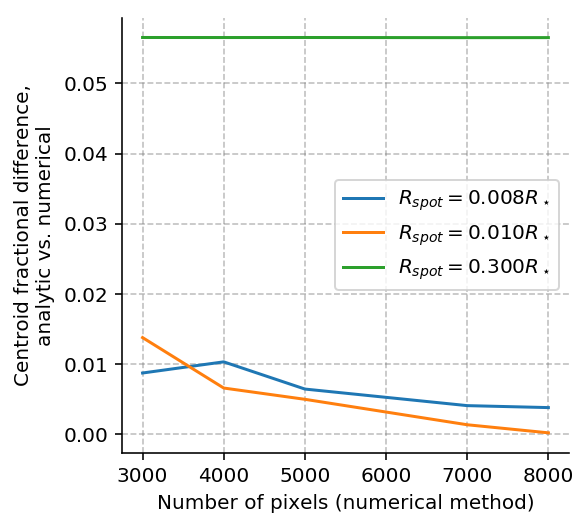

In [30]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for n_range, max_dev, r in zip(n_ranges, max_devs, r_range):
    ax.plot(n_range, max_dev, label='$R_{{spot}} = {0:.3f} R_\star$'.format(r))
#ax.set_xticklabels(n_range)
#ax.set_xticks(n_range)
ax.set_xlabel('Number of pixels (numerical method)')
ax.set_ylabel('Centroid fractional difference,\nanalytic vs. numerical')

ax.grid(ls='--', alpha=0.5, color='gray')
ax.legend()

fig.savefig('plots/validation.pdf', bbox_inches='tight')